In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [2]:
df = pd.read_parquet('../../../Data/2022_indicators/coef_no_zeros.parquet')
display(df.head())
print(df.shape)

,coef
CVDSTRK3_2.0,0.674171
GENHLTH_1.0,0.423359
CHCCOPD3_2.0,0.316742
DIABETE4_3.0,0.313035
CHCKDNY2_2.0,0.186300


(27, 1)


In [3]:
len(df)

27

In [4]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults Fair or Poor Health",
    "PERSDOC3_2.0": "1+ Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Daily Drinks",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Days (30 Days)",
    "_BMI5":"BMI", 
    "_DENVST3_1.0": "Visited the Dentist in Past Year",
    "_EXTETH3_1.0": "Adult Had Permanent Teeth Extracted",
    "MEDCOST1_2.0": "Couldn't Pay for Doc in past Year", 
    "LASTDEN4_1.0": "Time Since Last Dentist Visit", 
    "RMVTETH4_8.0": "No Teeth Removed", 
    "RMVTETH4_1.0": "1-5 Teeth Removed",
    "ADDEPEV3_2.0": "No Depressive Disorder",
    "_RACEG22_2.0": "Non-White or Hispanic", 
    "_RACEPR1_2.0": "Race: Black",
    "_IMPRACE_2.0": "Race: Black",
    "_RFBMI5_1.0": "BMI <= 25.00",
    "_METSTAT_2.0" : "Nonmetropolitan", 
    "WEIGHT2": "Weight",
    "_HADSIGM_1.0": "Had Sigmoidoscopy",
    "CHCSCNC1_1.0": "Had Skin Cancer (not Melanoma)",
    "RMVTETH4_2.0": "6+ Teeth Extracted",
    "COVIDPOS_1.0": "Had COVID",
    "LASTDEN4_4.0": "5+ Years Since Dentist",
    "_SMOKGRP_2.0": "Former smoker, 20+ Pack Years, quit < 15 years",
    "_EXTETH3_2.0": "18+ at Risk Has Teeth Extracted",
    "HAVARTH4_1.0": "Has Arthritis",
    "_DRDXAR2_1.0": "Has Arthritis",
    "_RFBMI5_2.0": "BMI > 25.00",
    "SMOKE100_1.0": "Smoked 100+ cigarettes",
    "PRIMINSR_1.0": "Health Insurance Through Employer",
    "BLIND_2.0": "Not Blind",
    "DEAF_2.0": "Not Deaf",
    "SMOKE100_2.0": "Smoked <100 Cigarettes",
    "_SMOKER3_4.0": "Never Smoked",
    "_SMOKGRP_4.0": "Never Smoked",
    "EMPLOY1_8.0": "Unable to Work",
    "WTKG3": "Weight (Kg)",
    "ALCDAY4":  "Alcohol Consumption Freq (Past 30 Days)"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [5]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in df.index]
df.index = mapped_columns
# mapped_columns

In [11]:
# 13898 / 108922
# 13898
len(df)

27

In [7]:
df = df.sort_values(by='coef', ascending=True)
df['color'] = 'gray'
df['color'][0:4] = 'salmon'
df['color'][23:27] = 'lightgreen'

/tmp/ipykernel_802111/521697626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'][0:4] = 'salmon'
/tmp/ipykernel_802111/521697626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'][23:27] = 'lightgreen'


In [8]:
df['label'] = df.index
# for i in range(4,26):
#     df['label'][i] = " " * i
# df

Text(0.5, 1.0, 'Feature Weights For Cardiovascular Heart Disease: L1 Logistic Regression')

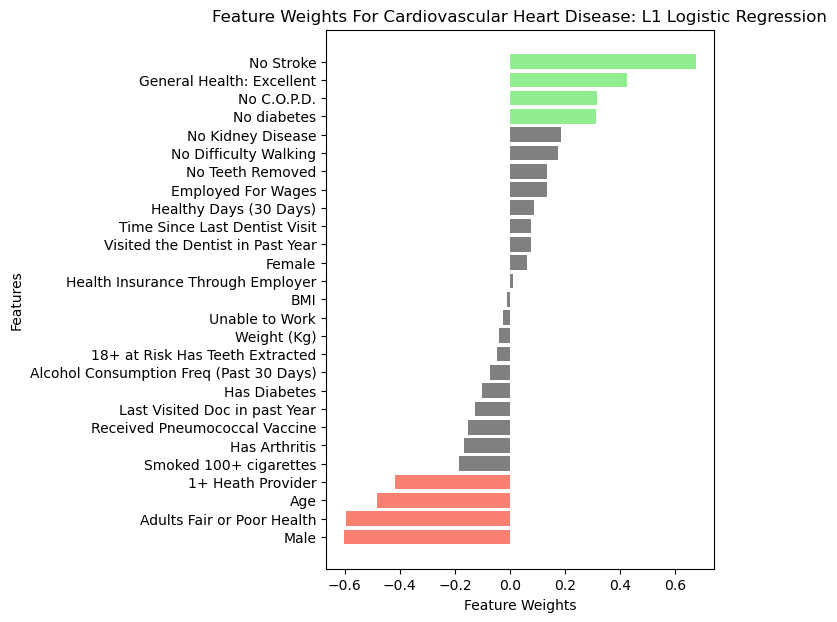

In [9]:
# Create a bar chart with colors and labels
fig, ax = plt.subplots(figsize=(5,7))
# bars = ax.barh(df.index, df['coef'], color=df['color'])
bars = ax.barh(df['label'], df['coef'], color=df['color'])



# Optional: Add labels and title
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
ax.set_title("Feature Weights For Cardiovascular Heart Disease: L1 Logistic Regression")

In [10]:
list(df.index)[::-1]

['No Stroke',
 'General Health: Excellent',
 'No C.O.P.D.',
 'No diabetes',
 'No Kidney Disease',
 'No Difficulty Walking',
 'No Teeth Removed',
 'Employed For Wages',
 'Healthy Days (30 Days)',
 'Time Since Last Dentist Visit',
 'Visited the Dentist in Past Year',
 'Female',
 'Health Insurance Through Employer',
 'BMI',
 'Unable to Work',
 'Weight (Kg)',
 '18+ at Risk Has Teeth Extracted',
 'Alcohol Consumption Freq (Past 30 Days)',
 'Has Diabetes',
 'Last Visited Doc in past Year',
 'Received Pneumococcal Vaccine',
 'Has Arthritis',
 'Smoked 100+ cigarettes',
 '1+ Heath Provider',
 'Age',
 'Adults Fair or Poor Health',
 'Male']